In [7]:
import requests

class Card:
    base_url = "https://api.pokemontcg.io/v2/cards/"

    @classmethod
    def find(cls, card_id):
        # Tạo URL cho card dựa trên ID
        url = cls.base_url + card_id
        # Gửi yêu cầu GET tới API
        response = requests.get(url)
        
        # Kiểm tra mã trạng thái phản hồi
        if response.status_code == 200:
            # Lấy dữ liệu JSON từ phản hồi
            data = response.json()
            return data
        else:
            print(f"Error: {response.status_code}")
            return None

# Nhập ID thẻ Pokémon từ người dùng
card_id = input("Nhập ID thẻ Pokémon: ")

# Tìm thẻ Pokémon theo ID được nhập
card = Card.find(card_id)

# Hiển thị thông tin thẻ nếu tìm thấy
if card:
    print(card)
    


{'data': {'id': 'xy1-1', 'name': 'Venusaur-EX', 'supertype': 'Pokémon', 'subtypes': ['Basic', 'EX'], 'hp': '180', 'types': ['Grass'], 'evolvesTo': ['M Venusaur-EX'], 'rules': ['Pokémon-EX rule: When a Pokémon-EX has been Knocked Out, your opponent takes 2 Prize cards.'], 'attacks': [{'name': 'Poison Powder', 'cost': ['Grass', 'Colorless', 'Colorless'], 'convertedEnergyCost': 3, 'damage': '60', 'text': "Your opponent's Active Pokémon is now Poisoned."}, {'name': 'Jungle Hammer', 'cost': ['Grass', 'Grass', 'Colorless', 'Colorless'], 'convertedEnergyCost': 4, 'damage': '90', 'text': 'Heal 30 damage from this Pokémon.'}], 'weaknesses': [{'type': 'Fire', 'value': '×2'}], 'retreatCost': ['Colorless', 'Colorless', 'Colorless', 'Colorless'], 'convertedRetreatCost': 4, 'set': {'id': 'xy1', 'name': 'XY', 'series': 'XY', 'printedTotal': 146, 'total': 146, 'legalities': {'unlimited': 'Legal', 'expanded': 'Legal'}, 'ptcgoCode': 'XY', 'releaseDate': '2014/02/05', 'updatedAt': '2018/03/04 10:35:00', 

In [5]:
import requests

class Card:
    base_url = "https://api.pokemontcg.io/v2/cards/"

    @classmethod
    def find(cls, card_id):
        # Tạo URL cho card dựa trên ID
        url = cls.base_url + card_id
        # Gửi yêu cầu GET tới API
        response = requests.get(url)
        
        # Kiểm tra mã trạng thái phản hồi
        if response.status_code == 200:
            # Lấy dữ liệu JSON từ phản hồi
            data = response.json()
            return data
        else:
            print(f"Error: {response.status_code}")
            return None

# Nhập ID thẻ Pokémon từ người dùng
card_id = input("Nhập ID thẻ Pokémon: ")

# Tìm thẻ Pokémon theo ID được nhập
card = Card.find(card_id)

# Hiển thị thông tin thẻ nếu tìm thấy
if card:
    card_data = card['data']
    print(f"ID: {card_data['id']}")
    print(f"Name: {card_data['name']}")
    
    # In thông tin prices trong tcgplayer
    if 'tcgplayer' in card_data and isinstance(card_data['tcgplayer']['prices'], dict):
        tcgplayer_prices = card_data['tcgplayer']['prices']
        print("TCGPlayer Prices:")
        
        # Kiểm tra và in giá reverseHolofoil nếu có
        if 'reverseHolofoil' in tcgplayer_prices:
            print(f"  Reverse Holofoil: {tcgplayer_prices['reverseHolofoil']}")

        # In các giá khác
        for price_type, price_value in tcgplayer_prices.items():
            if price_type != 'reverseHolofoil':  # Không in reverseHolofoil ở đây nữa
                print(f"  {price_type.capitalize()}: {price_value}")

    # In thông tin prices trong cardmarket
    if 'cardmarket' in card_data and isinstance(card_data['cardmarket']['prices'], dict):
        cardmarket_prices = card_data['cardmarket']['prices']
        print("CardMarket Prices:")
        for price_type, price_value in cardmarket_prices.items():
            print(f"  {price_type.capitalize()}: {price_value}")


ID: xy1-1
Name: Venusaur-EX
TCGPlayer Prices:
  Holofoil: {'low': 1.7, 'mid': 3.1, 'high': 12.95, 'market': 3.42, 'directLow': None}
CardMarket Prices:
  Averagesellprice: 8.11
  Lowprice: 2.0
  Trendprice: 16.02
  Germanprolow: 0.0
  Suggestedprice: 0.0
  Reverseholosell: 0.0
  Reversehololow: 0.0
  Reverseholotrend: 4.37
  Lowpriceexplus: 3.49
  Avg1: 5.99
  Avg7: 23.63
  Avg30: 9.06
  Reverseholoavg1: 3.99
  Reverseholoavg7: 4.56
  Reverseholoavg30: 4.47


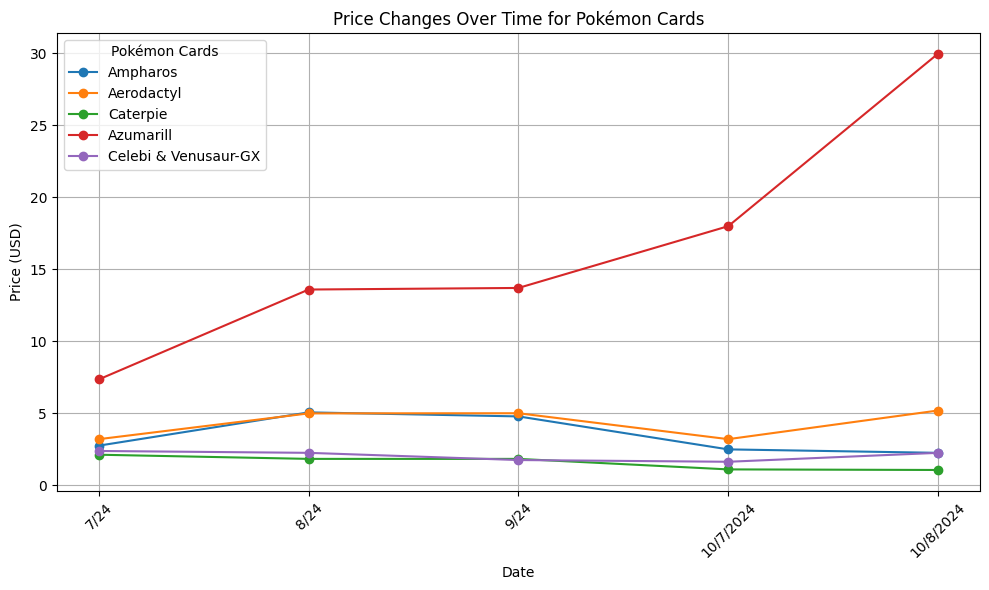

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the dataset based on the provided data
data = {
    'id': ['dp3-1', 'ex12-1', 'mcd19-1', 'ex7-1', 'sm9-1'],
    'name': ['Ampharos', 'Aerodactyl', 'Caterpie', 'Azumarill', 'Celebi & Venusaur-GX'],
    '7/24': [2.75, 3.2, 2.12, 7.35, 2.38],
    '8/24': [5.06, 4.99, 1.83, 13.59, 2.25],
    '9/24': [4.78, 5, 1.83, 13.7, 1.75],
    '10/7/2024': [2.49, 3.2, 1.1, 17.99, 1.63],
    '10/8/2024': [2.25, 5.19, 1.06, 29.97, 2.25]
}

df = pd.DataFrame(data)

# Plotting the price changes for all cards
df.set_index('name', inplace=True)

# Extracting the prices for plotting
df_prices = df.drop(columns=['id']).T

# Plotting
plt.figure(figsize=(10, 6))
for col in df_prices.columns:
    plt.plot(df_prices.index, df_prices[col], marker='o', label=col)

plt.title('Price Changes Over Time for Pokémon Cards')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend(title='Pokémon Cards')
plt.grid(True)
plt.tight_layout()
plt.show()
